In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [ ]:
# 2. Upload files (RUN THIS CELL FIRST IN COLAB)
from google.colab import files
files.upload()   # upload: titles.csv, credits.csv

In [ ]:
# 3. Load datasets (SAFE, RELATIVE PATHS)
assert "titles.csv" in os.listdir(), "titles.csv not uploaded"
assert "credits.csv" in os.listdir(), "credits.csv not uploaded"

titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

In [ ]:
# 4. Basic checks
print(titles.shape, credits.shape)
titles.info()

(9871, 15) (124235, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dty

In [ ]:
# 5. Missing values handling
titles['release_year'] = pd.to_numeric(titles['release_year'], errors='coerce')
titles['imdb_score'].fillna(titles['imdb_score'].mean(), inplace=True)
titles['tmdb_score'].fillna(titles['tmdb_score'].mean(), inplace=True)
titles['imdb_votes'].fillna(titles['imdb_votes'].median(), inplace=True)
titles['tmdb_popularity'].fillna(titles['tmdb_popularity'].median(), inplace=True)
titles['genres'] = titles['genres'].fillna('Unknown')

/tmp/ipython-input-16260270.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['imdb_score'].fillna(titles['imdb_score'].mean(), inplace=True)
/tmp/ipython-input-16260270.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# 6. Prepare genres (explode)
titles_genres = titles.assign(
    genres=titles['genres'].str.split(',')
).explode('genres')
titles_genres['genres'] = titles_genres['genres'].str.strip()

# Chart 1: Distribution of Movies vs TV Shows

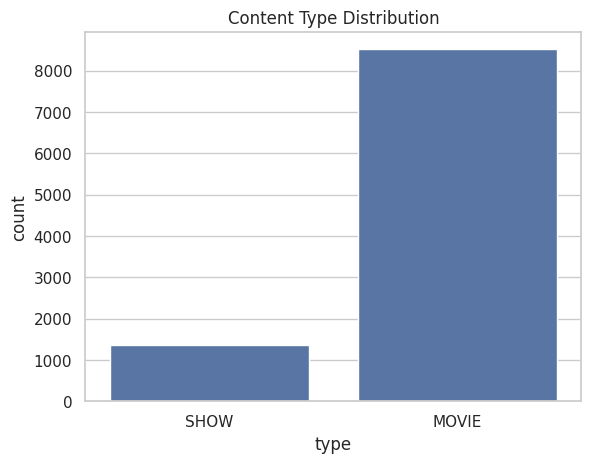

In [ ]:
# VISUALS

# Chart 1
sns.countplot(x='type', data=titles)
plt.title("Content Type Distribution")
plt.show()

# Chart 2: Top 10 most common genres

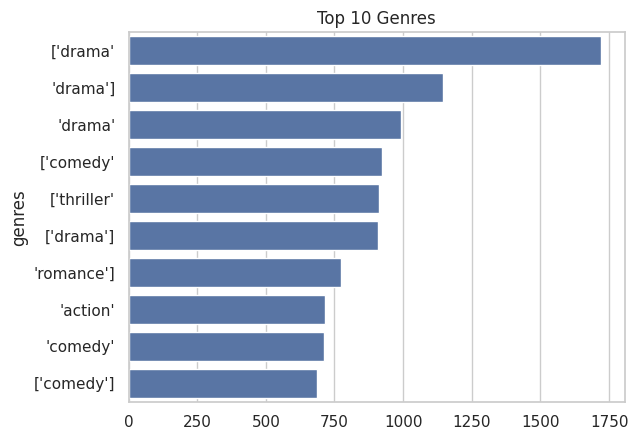

In [ ]:
# Chart 2
top_genres = titles_genres['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres")
plt.show()

# Chart 3: Number of releases by year

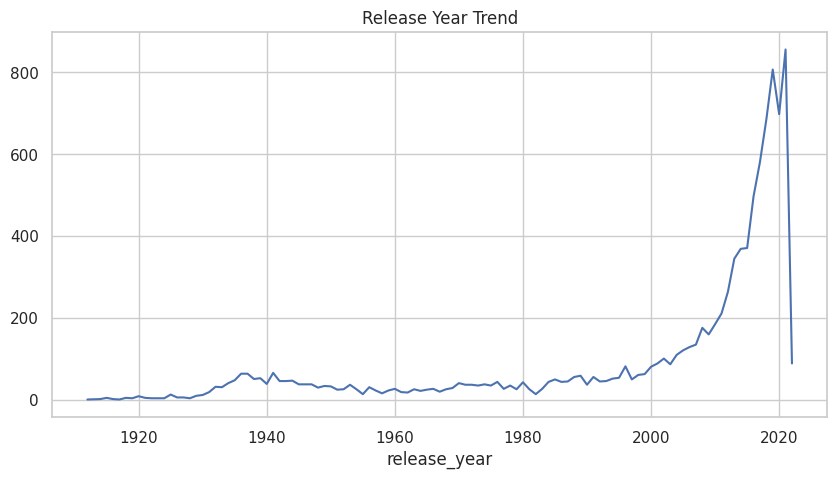

In [ ]:
# Chart 3
titles['release_year'].value_counts().sort_index().plot(figsize=(10,5))
plt.title("Release Year Trend")
plt.show()

# Chart 4: Distribution of IMDb scores

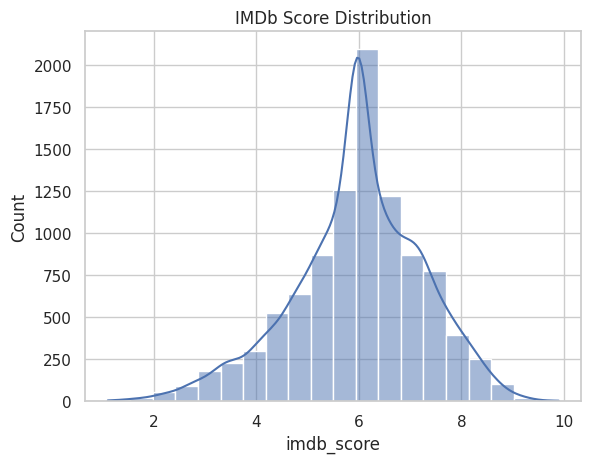

In [ ]:
# Chart 4
sns.histplot(titles['imdb_score'], bins=20, kde=True)
plt.title("IMDb Score Distribution")
plt.show()

# Chart 5: Relationship between IMDb votes and IMDb score

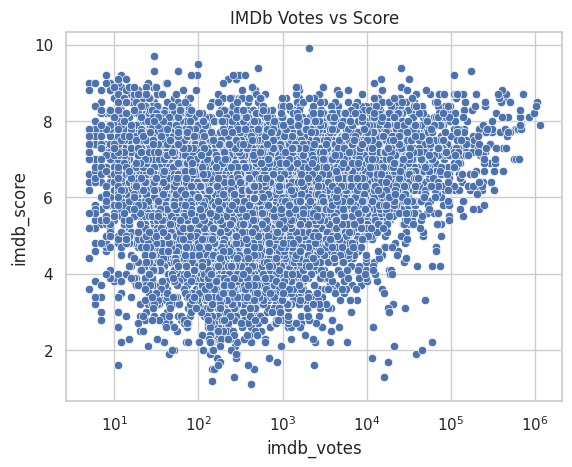

In [ ]:
# Chart 5
sns.scatterplot(x='imdb_votes', y='imdb_score', data=titles)
plt.xscale('log')
plt.title("IMDb Votes vs Score")
plt.show()

# Chart 6: Comparison of IMDb and TMDB scores

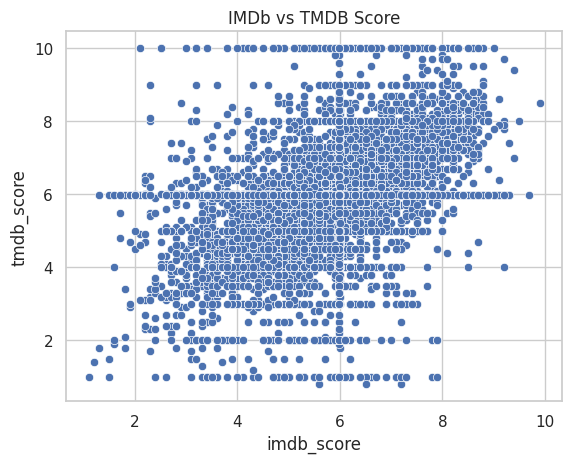

In [ ]:
# Chart 6
sns.scatterplot(x='imdb_score', y='tmdb_score', data=titles)
plt.title("IMDb vs TMDB Score")
plt.show()

# Chart 7: Runtime distribution by content type

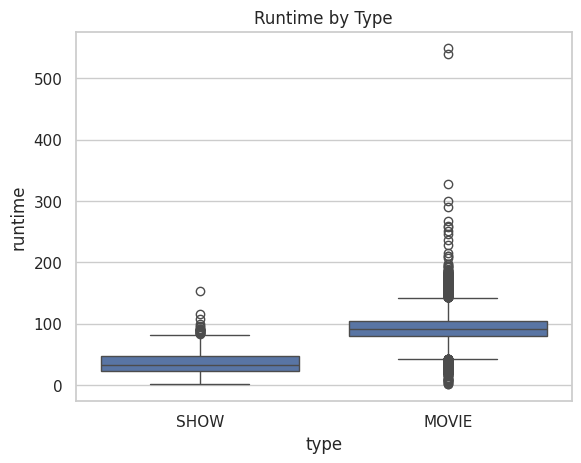

In [ ]:
# Chart 7
sns.boxplot(x='type', y='runtime', data=titles)
plt.title("Runtime by Type")
plt.show()

# Chart 8: Distribution of age certifications

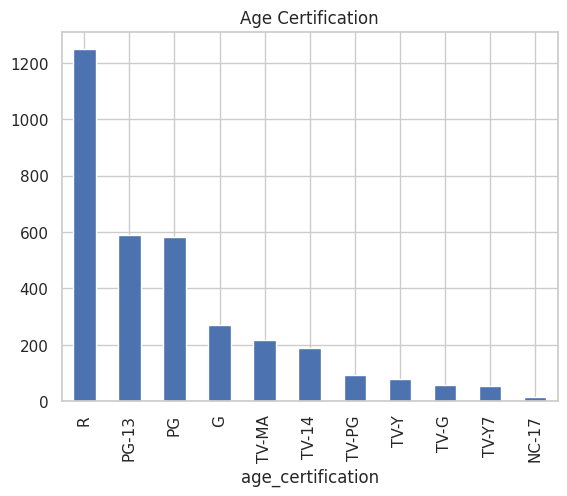

In [ ]:
# Chart 8
titles['age_certification'].value_counts().plot(kind='bar')
plt.title("Age Certification")
plt.show()


# Chart 9: Top 10 production countries

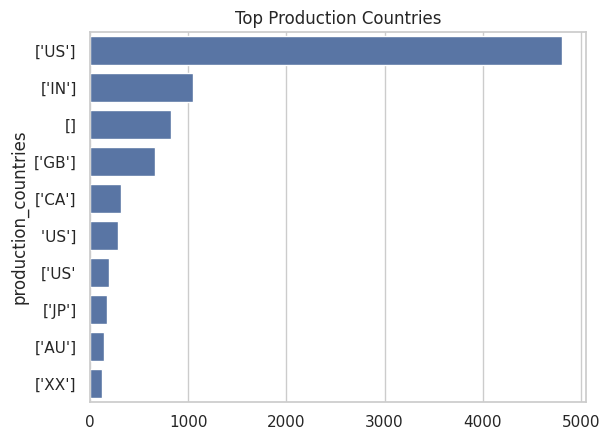

In [ ]:
# Chart 9
countries = titles['production_countries'].dropna().str.split(',').explode()
top_countries = countries.value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top Production Countries")
plt.show()


# Chart 10: TMDB popularity distribution

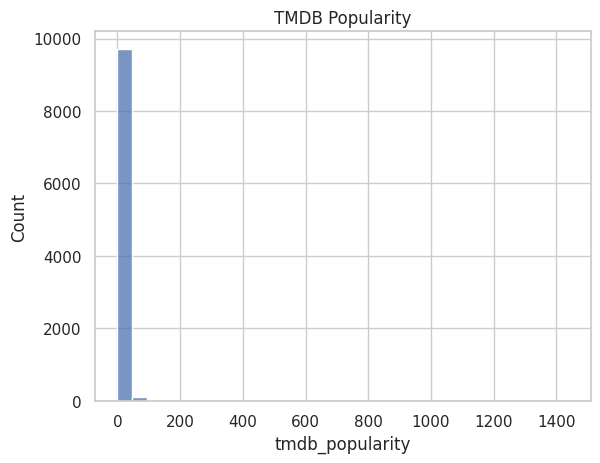

In [ ]:
# Chart 10
sns.histplot(titles['tmdb_popularity'], bins=30)
plt.title("TMDB Popularity")
plt.show()

# Chart 11: IMDb score comparison by content type

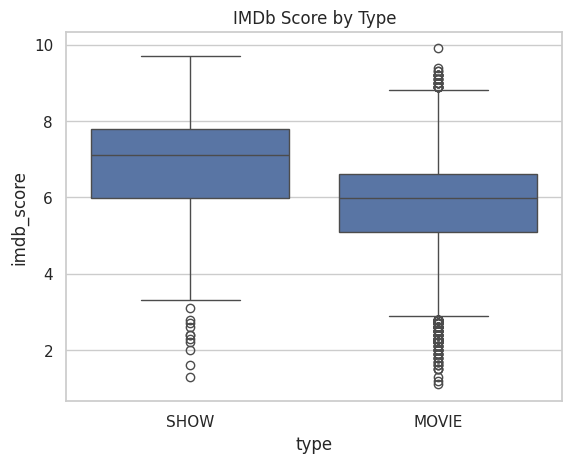

In [ ]:
# Chart 11
sns.boxplot(x='type', y='imdb_score', data=titles)
plt.title("IMDb Score by Type")
plt.show()

# Chart 12: Top 10 genres by average IMDb score

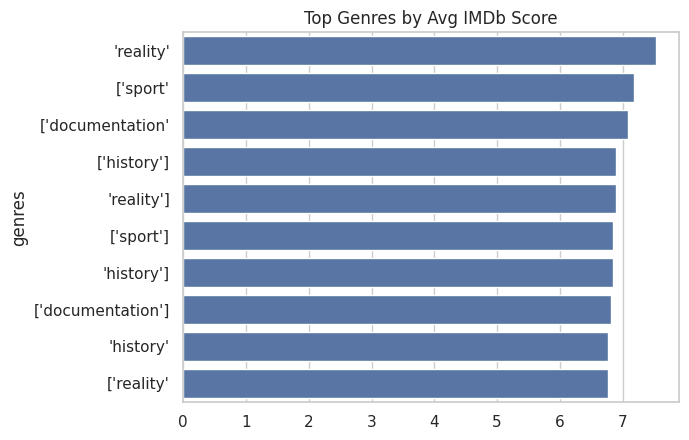

In [ ]:
# Chart 12
genre_rating = titles_genres.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title("Top Genres by Avg IMDb Score")
plt.show()

# Chart 13: Distribution of IMDb votes

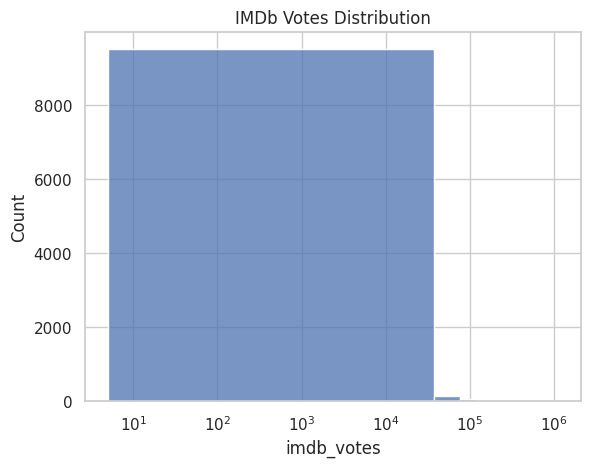

In [ ]:
# Chart 13
sns.histplot(titles['imdb_votes'], bins=30)
plt.xscale('log')
plt.title("IMDb Votes Distribution")
plt.show()

# Chart 14: Correlation heatmap between numerical features

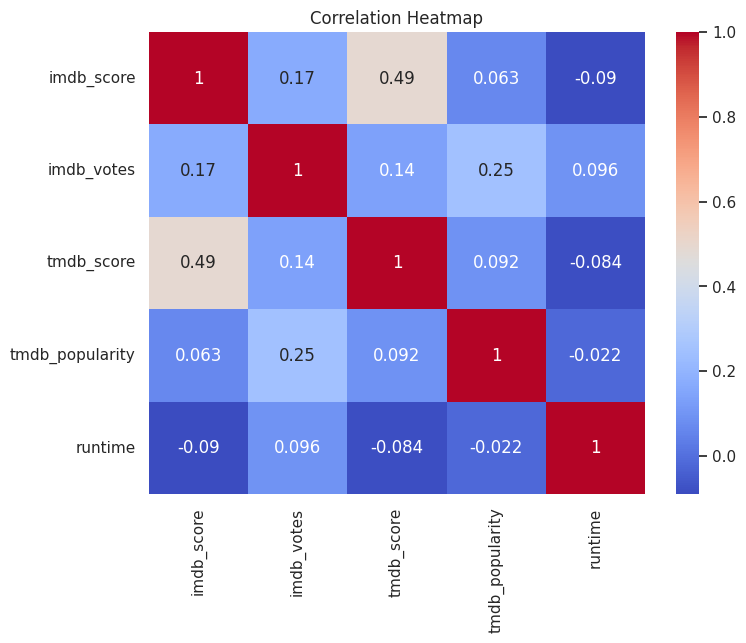

In [ ]:
# Chart 14
plt.figure(figsize=(8,6))
sns.heatmap(
    titles[['imdb_score','imdb_votes','tmdb_score','tmdb_popularity','runtime']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

# Chart 15: Pairwise relationships between selected numeric variables

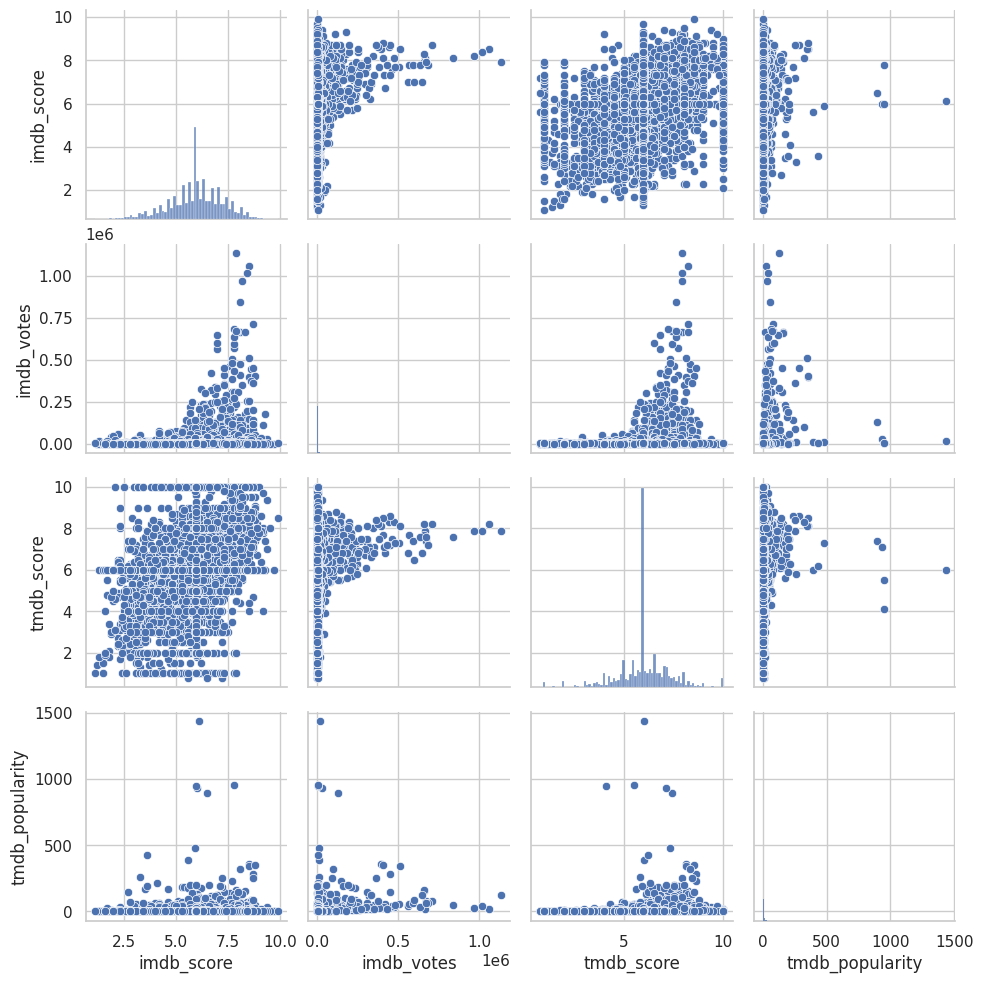

In [ ]:
# Chart 15
sns.pairplot(titles[['imdb_score','imdb_votes','tmdb_score','tmdb_popularity']])
plt.show()